In [ ]:
import numpy as np
with open('vectorized_fmri.npy', 'rb') as f:
    vectorized_fmri = np.load(f)

print(vectorized_fmri)

In [ ]:
vectorized_fmri.shape

(35960, 5317)

In [ ]:
img_size = 32
list_file = f'../../braindecoder/vectorized_images_{img_size}.npy'
with open(list_file, 'rb') as f:
    vectorized_img = np.load(f)

# flatten RGB 3D to 1D
vectorized_img = np.asarray(vectorized_img).flatten().reshape(len(vectorized_img), img_size * img_size * 3)
print(vectorized_img)

In [ ]:
vectorized_img.shape

[[219. 181. 162. ... 168. 169. 173.]
 [ 69. 117. 169. ... 163.  81.  72.]
 [141. 108.  91. ... 174. 144. 116.]
 ...
 [147. 213. 232. ... 220. 216. 195.]
 [  7.  24.  29. ...  45.  64.  42.]
 [ 62.  49.  37. ...  33.  22.  20.]]


(29270, 3072)

In [ ]:
import numpy as np
with open('fmri_id.npy', 'rb') as f:
    fmri_id = np.load(f)

print(fmri_id.shape)

(35960,)


In [ ]:
with open('/home/px48/gans-n-gmms/utils/img_paths.npy', 'rb') as f:
    img_paths_cleaned = np.load(f)
img_paths_cleaned

array(['sub01/run01/M0000.jpg', 'sub01/run01/F0000.jpg',
       'sub01/run01/M0001.jpg', ..., 'sub01/run107/F17906.jpg',
       'sub01/run107/M17907.jpg', 'sub01/run107/F17907.jpg'], dtype='<U23')

In [ ]:
img_paths_cleaned.shape

(29270,)

In [ ]:
with open('fmri_face_map.npy', 'rb') as f:
    fmri_face_map = np.load(f)

In [ ]:
concatenated_vectors = []
for index, face in enumerate(vectorized_img):
  fmri_index = fmri_face_map[index]
  concatenated_vector = np.concatenate((face, vectorized_fmri[fmri_index]))
  concatenated_vectors.append(concatenated_vector)

with open('concatenated_vectors.npy', 'wb') as f:
    np.save(f, concatenated_vectors)

with open('concatenated_vectors.npy', 'rb') as f:
    concatenated_vectors = np.load(f)
concatenated_vectors.shape

(29270, 8389)

In [ ]:
with open('concatenated_vectors.npy', 'rb') as f:
    concatenated_vectors = np.load(f)
concatenated_vectors.shape

Error: Session cannot generate requests

In [2]:
import numpy as np
with open('fmri_ids.npy', 'rb') as f:
    fmri_ids = np.load(f)

[[-0.39884838  0.14678198  0.53673577 ...  0.50394851  0.21608017
  -0.66035098]
 [-0.62375867  0.52171403  0.69669861 ...  0.3161197  -0.91412055
  -0.89503163]
 [-0.50430328  0.48940226  0.79250735 ...  0.17371643 -0.08662137
  -0.82327944]
 ...
 [ 0.66207588  0.24018949  0.24619068 ...  1.38331187 -0.12606634
   0.01799778]
 [-0.165635    0.07695606  0.43573871 ...  1.02285576  0.8566646
   0.5687992 ]
 [ 0.48586583  0.54663646  0.22718358 ...  0.73568606 -0.01514511
  -0.92851037]]


In [3]:
fmri_ids[:5]

array(['sub-01_ses-01_run-01_train_face', 'train_run01_F0031',
       'train_run01_M0043', 'train_run01_M0005', 'train_run01_M0003'],
      dtype='<U31')

In [16]:
face_ids = np.load("/home/px48/gans-n-gmms/fmri/fmri_ids_train.npy")
face_ids[:10]

array([], dtype=float64)

In [1]:
import numpy as np
concatenated = np.load("/home/px48/gans-n-gmms/fmri/ret.npy")

In [2]:
concatenated.shape

(29270, 17605)

In [20]:
from sklearn.model_selection import train_test_split
train_list, test_list = train_test_split(concatenated, test_size=0.2, random_state=42)

In [21]:
print("Train set")
print(train_list[:5])
print(".................")
print("Test set")
print(test_list[:5])


Train set
[[ 1.77961847e-04  1.52076493e-04  1.40751639e-04 ...  1.88061982e-01
  -8.35853815e-01 -2.42372334e-01]
 [ 1.86051024e-04  1.86051024e-04  2.00611539e-04 ...  1.02441572e-01
   6.63958907e-01  3.15356553e-01]
 [ 2.42675242e-06  3.23566996e-06  7.28025771e-06 ...  6.77528918e-01
   2.93376893e-01 -4.98032987e-01]
 [ 3.23566996e-06  2.42675242e-06  6.47133993e-06 ...  2.35488102e-01
   6.11768246e-01  6.48441434e-01]
 [ 1.88477774e-04  1.94949112e-04  1.97375877e-04 ... -2.05645517e-01
   3.67746979e-04 -4.47891861e-01]]
.................
Test set
[[ 3.55923694e-05  2.10318558e-05  1.94140193e-05 ... -7.84756839e-02
   7.26131976e-01  3.83546531e-01]
 [ 3.23567001e-05  3.07388655e-05  3.47834539e-05 ... -7.77437985e-02
   1.44011870e-01 -2.39910915e-01]
 [ 4.77261347e-05  4.93439693e-05  4.44904617e-05 ... -3.27155083e-01
   8.28272626e-02 -8.05716030e-03]
 [ 1.53694327e-05  1.21337625e-05  1.13248452e-05 ... -6.44058108e-01
   6.57532513e-02 -1.75238594e-01]
 [ 6.71401503e-05

In [7]:
import numpy as np

img_size = 32

list_file = f'../../braindecoder/vectorized_images_{img_size}.npy'
with open(list_file, 'rb') as f:
    vectorized_img = np.load(f)

# flatten RGB 3D to 1D
vectorized_img = np.asarray(vectorized_img).flatten().reshape(len(vectorized_img), img_size * img_size * 3)

comp_path = "/home/px48/gans-n-gmms/15_components.npy"
components_obj = np.load(comp_path, allow_pickle=True)
MUs = []
keys = components_obj.item().keys()
for key in keys:
  MU = components_obj.item().get(key)['mu'][:img_size ** 2 * 3]
  MUs.append(MU)

print(max(MUs[0]), min(MUs[0]))
with open('MUs_15_components.npy', 'wb') as f:
    np.save(f, MUs)


0.8531579 0.12303355


0.12303355 0.8531579


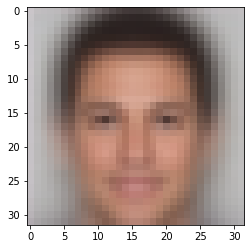

In [8]:
import matplotlib.pyplot as plt
def to_image(sample, w, h, ch=3):
    return sample.reshape([h, w, ch])

def im_show(img):
    print(min(img.flatten()), max(img.flatten()))
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, vmin=0, vmax=1, cmap='gray')
img = to_image(MUs[0], img_size, img_size)
im_show(img)

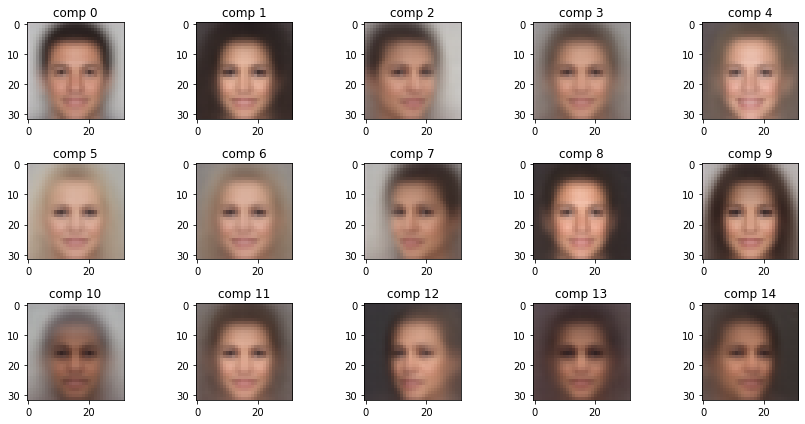

In [17]:
import matplotlib.pyplot as plt
def to_image(sample, w, h, ch=3):
    return sample.reshape([h, w, ch])

rows = 3
cols = 5

axes=[]
fig=plt.figure(figsize=(12, 6))

for a in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, a+1) )
    subplot_title=("comp "+str(a))
    axes[-1].set_title(subplot_title)
    img = to_image(MUs[a], img_size, img_size)
    plt.imshow(img)
fig.tight_layout()    
plt.show()